<div style="text-align: center;
            background-color: rgba(13, 77, 100, 0.8);">
    <h1 style="color: white;
               font-size: 150%;
               font-family: Nexa;
               letter-spacing: 0.1px;
               padding: 0px;
               margin-bottom: 0;">
        <br>Entregable Semana 5<br>
    </h1>
</div>

**Corporación Universitaria Minuto de Dios**

**Programa:**

Especialización en Inteligencia Artificial

**Materia:**

Machine Learning Avanzado

**Título del trabajo:**

Presentación de diapositivas. Automatización de procesos para el flujo de trabajo en
Machine Learning

Semana 7

**Presenta:**

Melissa Fonseca Veitia

Ruber Alberto Barrios Rodríguez

Samir Romero Cárdenas

Darwin Yadir Londoño Ochoa

**Docente Tutor:**

Claudia Marcela Ospina Mosquera

Bogotá
<img src="https://lh6.googleusercontent.com/proxy/hUs0evoAZsSTPn54JaF6GAO-yATK9jHg_aZUkPigJdo0krFhosnJZcwBxmtlODmPE6gYBYC_p2ya5Ycx1zb2zF75dfzt-5H2UlhlyCMUrgpdSVMpaE8z2w=w1200-h630-p-k-no-nu" width="200"/>

### Importación de Librerías y cargue del set de Datos

In [33]:
#Librerias a importar
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
#librerias para visualización
import matplotlib.pyplot as plt
import seaborn as sns
#libreria para codificar variables categóricas
from sklearn.preprocessing import LabelEncoder

In [34]:
df = pd.read_csv('Data_Base.csv',sep=';')#El archivo se carga de la misma carpeta dónde está el código

### Preparación y procesamiento del set de datos

In [35]:
df.head(5)#Validamos el cargue del set de datos

,ID,ESTU_CONSECUTIVO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_SEMESTRECURSA,...,ESTU_NUCLEO_PREGRADO,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,ESTU_NSE_IES,Edad
0,1,EK201950126329,ESPAÑA,M,24/01/1980,BOGOTÁ,11,BOGOTÁ D.C.,11001,9,...,EDUCACIÓN,149,207,132,205,B2,192.0,177,4,"43,82739726"
1,2,EK201950129914,FRANCIA,M,20/06/1996,BOGOTÁ,11,BOGOTÁ D.C.,11001,10,...,INGENIERÍA INDUSTRIAL Y AFINES,154,136,112,300,B2,165.0,173,4,"27,4109589"
2,3,EK201950126410,FRANCIA,M,15/01/1996,BOGOTÁ,11,BOGOTÁ D.C.,11001,10,...,INGENIERÍA CIVIL Y AFINES,300,196,69,215,B2,141.0,184,4,"27,84109589"
3,4,EK201950126402,FRANCIA,F,14/04/1996,BOGOTÁ,11,BOGOTÁ D.C.,11001,10,...,INGENIERÍA CIVIL Y AFINES,216,173,185,217,B2,167.0,192,4,"27,59452055"
4,5,EK201950127997,MÉXICO,M,19/10/1996,BOGOTÁ,11,BOGOTÁ D.C.,11001,10,...,ECONOMÍA,211,214,184,212,B2,193.0,203,4,"27,07945205"


In [36]:
df.info()#Validamos la información que está almacenada en el dataset-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         3504 non-null   int64  
 1   ESTU_CONSECUTIVO           3504 non-null   object 
 2   ESTU_NACIONALIDAD          3504 non-null   object 
 3   ESTU_GENERO                3504 non-null   object 
 4   ESTU_FECHANACIMIENTO       3504 non-null   object 
 5   ESTU_DEPTO_RESIDE          3504 non-null   object 
 6   ESTU_COD_RESIDE_DEPTO      3504 non-null   int64  
 7   ESTU_MCPIO_RESIDE          3504 non-null   object 
 8   ESTU_COD_RESIDE_MCPIO      3504 non-null   int64  
 9   ESTU_SEMESTRECURSA         3504 non-null   int64  
 10  FAMI_EDUCACIONPADRE        3504 non-null   object 
 11  FAMI_EDUCACIONMADRE        3504 non-null   object 
 12  FAMI_ESTRATOVIVIENDA       3504 non-null   object 
 13  FAMI_TRABAJOLABORPADRE     3504 non-null   objec

In [37]:
#Revisamos algunos datos estadisticos del dataframe
df.describe()

,ID,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_SEMESTRECURSA,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,ESTU_NSE_IES
count,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3498.000000,3504.000000,3504.0
mean,1752.500000,13.063356,13108.827055,9.302226,189.321632,188.124144,181.350742,192.671804,159.187250,182.080479,4.0
std,1011.661999,8.492242,8567.714732,2.071581,27.926520,26.169298,31.748548,28.009819,38.925195,19.034618,0.0
min,1.000000,5.000000,5001.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,58.000000,4.0
25%,876.750000,11.000000,11001.000000,8.000000,175.000000,175.000000,169.000000,179.000000,138.000000,172.000000,4.0
50%,1752.500000,11.000000,11001.000000,9.000000,191.000000,190.000000,188.000000,194.000000,163.000000,184.000000,4.0
75%,2628.250000,11.000000,11001.000000,11.000000,207.000000,205.000000,202.000000,207.000000,184.000000,194.000000,4.0
max,3504.000000,97.000000,97001.000000,12.000000,300.000000,300.000000,300.000000,300.000000,300.000000,241.000000,4.0


In [38]:
#Revisamos algunos datos estadisticos del dataframe (incluimos algunos tipo object)
df.describe(include="all")

,ID,ESTU_CONSECUTIVO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_SEMESTRECURSA,...,ESTU_NUCLEO_PREGRADO,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,ESTU_NSE_IES,Edad
count,3504.000000,3504,3504,3504,3504,3504,3504.000000,3504,3504.000000,3504.000000,...,3504,3504.000000,3504.000000,3504.000000,3504.000000,3456,3498.000000,3504.000000,3504.0,3504
unique,NaN,3504,5,2,1993,26,NaN,96,NaN,NaN,...,37,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1993
top,NaN,EK201950126329,COLOMBIA,M,13/09/1997,BOGOTÁ,NaN,BOGOTÁ D.C.,NaN,NaN,...,QUÍMICA Y AFINES,NaN,NaN,NaN,NaN,B1,NaN,NaN,NaN,"26,17808219"
freq,NaN,1,3497,2236,9,3139,NaN,3139,NaN,NaN,...,206,NaN,NaN,NaN,NaN,1493,NaN,NaN,NaN,9
mean,1752.500000,NaN,NaN,NaN,NaN,NaN,13.063356,NaN,13108.827055,9.302226,...,NaN,189.321632,188.124144,181.350742,192.671804,NaN,159.187250,182.080479,4.0,NaN
std,1011.661999,NaN,NaN,NaN,NaN,NaN,8.492242,NaN,8567.714732,2.071581,...,NaN,27.926520,26.169298,31.748548,28.009819,NaN,38.925195,19.034618,0.0,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5001.000000,0.000000,...,NaN,70.000000,0.000000,0.000000,0.000000,NaN,0.000000,58.000000,4.0,NaN
25%,876.750000,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,11001.000000,8.000000,...,NaN,175.000000,175.000000,169.000000,179.000000,NaN,138.000000,172.000000,4.0,NaN
50%,1752.500000,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,11001.000000,9.000000,...,NaN,191.000000,190.000000,188.000000,194.000000,NaN,163.000000,184.000000,4.0,NaN
75%,2628.250000,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,11001.000000,11.000000,...,NaN,207.000000,205.000000,202.000000,207.000000,NaN,184.000000,194.000000,4.0,NaN


#### Tratamiento de datos Faltantes
________

In [39]:
# Identificamos aquellos NaN y su ubicación.
print(df.isnull().sum())

ID                            0
ESTU_CONSECUTIVO              0
ESTU_NACIONALIDAD             0
ESTU_GENERO                   0
ESTU_FECHANACIMIENTO          0
ESTU_DEPTO_RESIDE             0
ESTU_COD_RESIDE_DEPTO         0
ESTU_MCPIO_RESIDE             0
ESTU_COD_RESIDE_MCPIO         0
ESTU_SEMESTRECURSA            0
FAMI_EDUCACIONPADRE           0
FAMI_EDUCACIONMADRE           0
FAMI_ESTRATOVIVIENDA          0
FAMI_TRABAJOLABORPADRE        0
FAMI_TRABAJOLABORMADRE        0
ESTU_NUCLEO_PREGRADO          0
MOD_RAZONA_CUANTITAT_PUNT     0
MOD_LECTURA_CRITICA_PUNT      0
MOD_COMPETEN_CIUDADA_PUNT     0
MOD_INGLES_PUNT               0
MOD_INGLES_DESEM             48
MOD_COMUNI_ESCRITA_PUNT       6
PUNT_GLOBAL                   0
ESTU_NSE_IES                  0
Edad                          0
dtype: int64


___
Tenemos valores nulos en el Modulo de Desempeño de inglés, realizamos una comparación por niveles de desempeño, notando una relación de intervalos para puntajes, contrastamos esta información con la página de puntajes del icfes saber PRO
https://www2.icfes.gov.co/documents/39286/10327236/Niveles+de+desempe%C3%B1o+ingles+Saber+Pro.pdf#:~:text=Niveles%20de%20desempe%C3%B1o%20El%20m%C3%B3dulo%20de%20ingl%C3%A9s%20est%C3%A1,de%20desempe%C3%B1o%3A%20-A1%2C%20A1%2C%20A2%2C%20B1%20y%20B2.


<img src="Imagen.jpg" alt="Texto alternativo" width="500"/>

In [40]:
df['MOD_INGLES_DESEM']=df['MOD_INGLES_DESEM'].fillna('NULO')#Cambiamos los nan por nulo para que salgan en la agrupación
df.groupby('MOD_INGLES_DESEM').agg(
    MIN_MOD_INGLES_PUNT=('MOD_INGLES_PUNT', 'min'),
    MAX_MOD_INGLES_PUNT=('MOD_INGLES_PUNT', 'max')
).reset_index()

,MOD_INGLES_DESEM,MIN_MOD_INGLES_PUNT,MAX_MOD_INGLES_PUNT
0,A1,123,145
1,A2,146,170
2,B1,171,199
3,B2,200,300
4,NULO,0,122


In [41]:
#Este nivel nulo coincide con el nivel -A1. Por tanto reemplazamos valores nulo por -A1
df['MOD_INGLES_DESEM']=df['MOD_INGLES_DESEM'].str.replace('NULO','-A1')
df['MOD_INGLES_DESEM'].unique() # Validamos los valores de la variable

array(['B2', 'B1', 'A2', '-A1', 'A1'], dtype=object)

In [42]:
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].str.replace('ND','Sin Estrato')#Cambiamos el valor ND
df['FAMI_EDUCACIONPADRE']  = df['FAMI_EDUCACIONPADRE'].str.replace('ND','Ninguno')#Cambiamos el valor ND
df['FAMI_EDUCACIONMADRE']  = df['FAMI_EDUCACIONMADRE'].str.replace('ND','Ninguno')#Cambiamos el valor ND

In [43]:
#Finalmente en el puntaje de Comunicación escrita, si no tiene datos colocaremos 0
df['MOD_COMUNI_ESCRITA_PUNT']=df['MOD_COMUNI_ESCRITA_PUNT'].fillna(0)

In [44]:
print(df.isnull().sum())

ID                           0
ESTU_CONSECUTIVO             0
ESTU_NACIONALIDAD            0
ESTU_GENERO                  0
ESTU_FECHANACIMIENTO         0
ESTU_DEPTO_RESIDE            0
ESTU_COD_RESIDE_DEPTO        0
ESTU_MCPIO_RESIDE            0
ESTU_COD_RESIDE_MCPIO        0
ESTU_SEMESTRECURSA           0
FAMI_EDUCACIONPADRE          0
FAMI_EDUCACIONMADRE          0
FAMI_ESTRATOVIVIENDA         0
FAMI_TRABAJOLABORPADRE       0
FAMI_TRABAJOLABORMADRE       0
ESTU_NUCLEO_PREGRADO         0
MOD_RAZONA_CUANTITAT_PUNT    0
MOD_LECTURA_CRITICA_PUNT     0
MOD_COMPETEN_CIUDADA_PUNT    0
MOD_INGLES_PUNT              0
MOD_INGLES_DESEM             0
MOD_COMUNI_ESCRITA_PUNT      0
PUNT_GLOBAL                  0
ESTU_NSE_IES                 0
Edad                         0
dtype: int64


In [45]:
df['Edad']=round(df['Edad'].str.replace(',','.').astype('float'),0).astype('int')#Convertimos la edad a entero

In [46]:
df.describe()

,ID,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_SEMESTRECURSA,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,ESTU_NSE_IES,Edad
count,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.0,3504.000000
mean,1752.500000,13.063356,13108.827055,9.302226,189.321632,188.124144,181.350742,192.671804,158.914669,182.080479,4.0,28.445776
std,1011.661999,8.492242,8567.714732,2.071581,27.926520,26.169298,31.748548,28.009819,39.444963,19.034618,0.0,3.182511
min,1.000000,5.000000,5001.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,58.000000,4.0,24.000000
25%,876.750000,11.000000,11001.000000,8.000000,175.000000,175.000000,169.000000,179.000000,138.000000,172.000000,4.0,26.000000
50%,1752.500000,11.000000,11001.000000,9.000000,191.000000,190.000000,188.000000,194.000000,163.000000,184.000000,4.0,28.000000
75%,2628.250000,11.000000,11001.000000,11.000000,207.000000,205.000000,202.000000,207.000000,184.000000,194.000000,4.0,29.000000
max,3504.000000,97.000000,97001.000000,12.000000,300.000000,300.000000,300.000000,300.000000,300.000000,241.000000,4.0,61.000000


<h3>Exploramos relaciones entre los datos</h3>

<Axes: xlabel='Edad', ylabel='Density'>

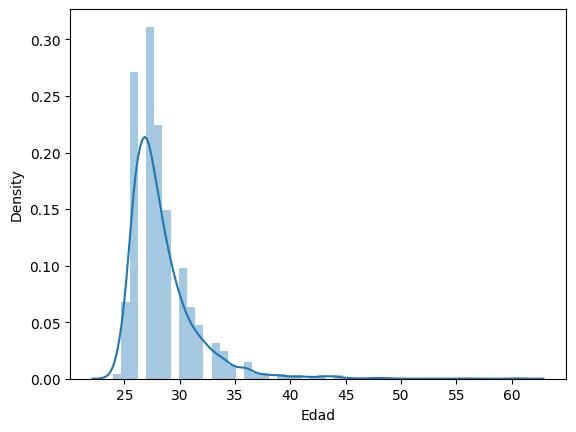

In [47]:
#Histograma del atributo
sns.distplot(df.Edad)

<Axes: xlabel='PUNT_GLOBAL', ylabel='Density'>

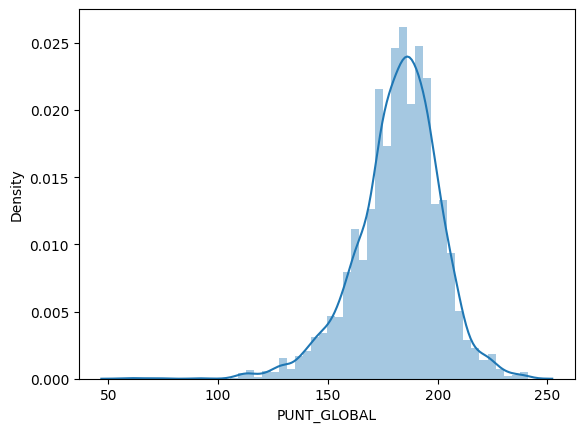

In [48]:
#Histograma del atributo
sns.distplot(df.PUNT_GLOBAL)

<Axes: xlabel='PUNT_GLOBAL', ylabel='ESTU_GENERO'>

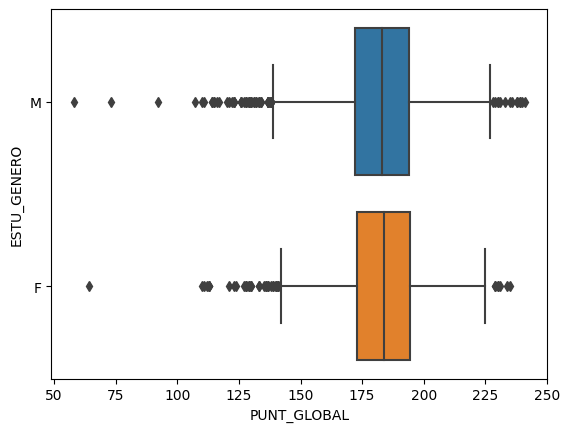

In [49]:
#Visualizamos la relación puntaje y genero.
sns.boxplot(x= "PUNT_GLOBAL", y="ESTU_GENERO", data=df)

<Axes: xlabel='PUNT_GLOBAL', ylabel='ESTU_NACIONALIDAD'>

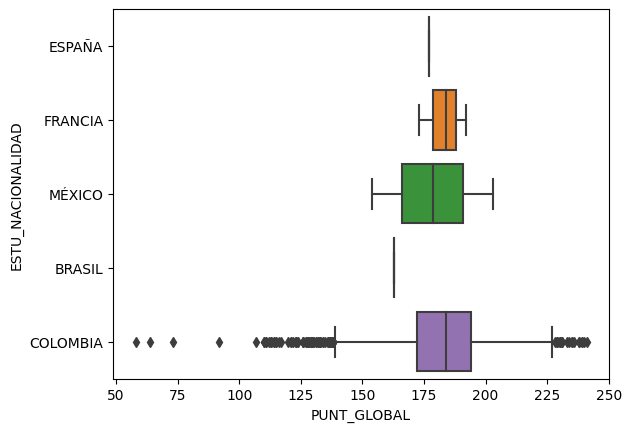

In [50]:
#Visualizamos la relación puntaje y genero.
sns.boxplot(x= "PUNT_GLOBAL", y="ESTU_NACIONALIDAD", data=df)

<Axes: xlabel='PUNT_GLOBAL', ylabel='ESTU_GENERO'>

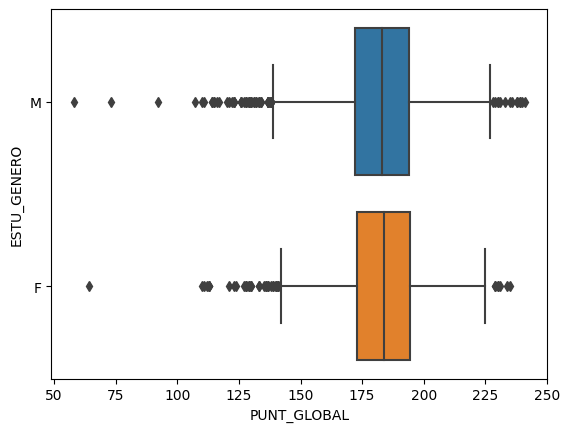

In [51]:
#Visualizamos la relación puntaje y genero.
sns.boxplot(x= "PUNT_GLOBAL", y="ESTU_GENERO", data=df)

____
Basado en lo anterior comenzaremos a implementar un Modelo de Machine Learning que nos permita poder identificar que variables o características pueden relacionarse con el puntaje obtenido por los estudiantes, para esto aplicaremos en primera instancia técnicas de Aprendizaje no Supervisado
K- Means

In [52]:
#Seleccionamos las columnas que van a hacer parte de nuestro modelo.
df_modelo=df[['ESTU_NACIONALIDAD', 'ESTU_GENERO','ESTU_NUCLEO_PREGRADO','MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT',
              'MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_INGLES_DESEM', 'MOD_COMUNI_ESCRITA_PUNT', 'PUNT_GLOBAL']]

In [53]:
# Convertimos las variables categóricas a numéricas para poder hacer entranamiento.
print(df_modelo['ESTU_GENERO'].unique())#imprimimos los valores de la variable antes de cambiarlos
df_modelo['ESTU_GENERO'] = df_modelo['ESTU_GENERO'].replace({'M': 1, 'F': 0})#Cambiamos por valore numéricos
print(df_modelo['ESTU_GENERO'].unique())

['M' 'F']
[1 0]


In [54]:
def transformacion_y_renombrar(df, columna_original, nombres_intervalos, nuevo_nombre):
    # Crear una nueva columna usando pd.cut
    df[nuevo_nombre] = pd.cut(df[columna_original], bins=4, labels=nombres_intervalos, right=False)
    # Mostrar los intervalos asignados a cada valor
    df=df.drop([columna_original],axis=1)
    return df

In [55]:
# Usamos la función con df_modelo
nombres_intervalos = [0, 1, 2, 3]
lista=['puntaje','lectura_critica','competencia_ciudadana','ingles','comunicacion_escrita','razonamiento']
lista_nombres=[ 'PUNT_GLOBAL','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT',
               'MOD_COMUNI_ESCRITA_PUNT','MOD_RAZONA_CUANTITAT_PUNT']
for i, j in zip(lista, lista_nombres):
    nombre_columna_transformada = str(i)  # columna transformada
    df_modelo = transformacion_y_renombrar(df_modelo, j, nombres_intervalos, nombre_columna_transformada)

Aplicaremos para las variables el método de Codificación de Etiquetas (Label Encoding): Esta técnica asigna un número a cada valor único en una columna categórica.
____

In [56]:
variables_objeto = df_modelo.select_dtypes(include=['object'])
cantidad_variables_objeto = len(variables_objeto.columns)#Contamos la cantidad de columnas que tienen tipo 'object'
print(f"La cantidad de variables categóricas es: {cantidad_variables_objeto}")

La cantidad de variables categóricas es: 3


In [57]:
label_encoder = LabelEncoder()
for columna in variables_objeto:
    df_modelo[columna] = label_encoder.fit_transform(df[columna])

## Entrenamiento del MODELO

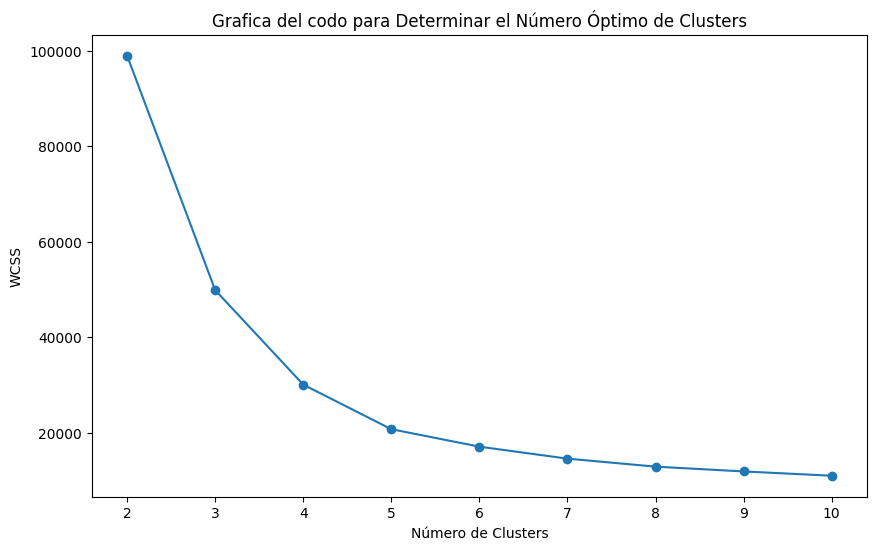

In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #Importamos KMEANS

# Crear una lista para almacenar los valores de WCSS
wcss = []

# Probar diferentes números de clusters (por ejemplo, del 1 al 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1050, n_init=10, random_state=0)
    kmeans.fit(df_modelo)  # Donde X es tu conjunto de datos
    wcss.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Grafica del codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()


Probaremos seleccionar 5 clusters
___

In [59]:
# Crear una instancia de KMeans con los hiperparámetros deseados
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=400, random_state=0)

# Entrenar el modelo
clusters = kmeans.fit_predict(df_modelo) # Donde X es tu conjunto de datos

# Obtener las etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Obtener las coordenadas de los centroides
centroids = kmeans.cluster_centers_
df_modelo['Cluster'] = clusters

In [60]:
df_modelo['Cluster'].sort_values().unique()

array([0, 1, 2, 3, 4], dtype=int32)

In [61]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_modelo, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5465004144540028


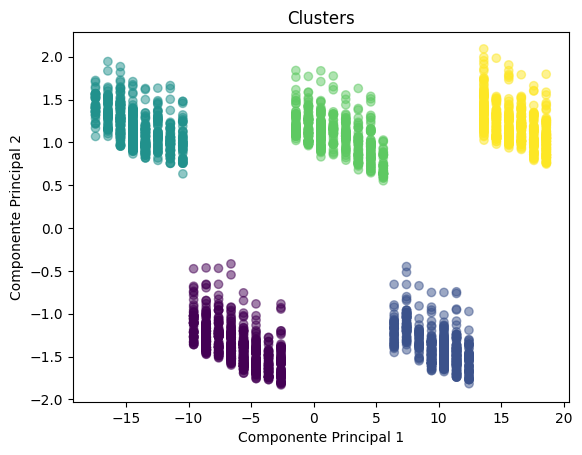

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que 'X' es tu conjunto de datos y 'clusters' son las asignaciones de clusters
pca = PCA(n_components=2)  # Especificamos que queremos reducir a 2 dimensiones
X_pca = pca.fit_transform(df_modelo)  # Aplicamos PCA a tus datos

# Graficar los puntos de datos con colores según el cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Agregar etiquetas y título
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters')

# Mostrar la gráfica
plt.show()

### Conclusiones Iniciales
Quisimos abordar en primera instancia un modelo de clustering, para las caracteristicas que tuvieran que ver con el estudiante, adicionalmente usamos el algoritmo de Kmeans, para esta labor, se hizo procesamiento de datos, y conversión de las variables categóricas usando diferentes métodos, también usamos el método del codo para validar la cantidad de intervalos necesarios, y comprobamos nuestros resultados mediante el coeficiente de Silueta.

El coeficiente de Silueta, es una medida utilizada para evaluar la calidad de un clustering. Este coeficiente varía entre -1 y 1, donde un valor cercano a 1 indica que los clusters están bien definidos y separados, 0 indica solapamiento entre clusters y -1 indica que las muestras han sido asignadas al cluster incorrecto.

Un valor de 0.5465 en el coeficiente de Silhouette generalmente se considera un resultado moderadamente bueno. Esto sugiere que la estructura de clusters identificada tiene una buena separación entre los clusters, pero aún hay espacio para mejorar.

Podríamos intentar manipular los hiperparámetros, selección de características o ver resultados con otro modelo.

**Referencias**

*   Bi, O. et al. (2019). What is Machine Learning? A Primer for the Epidemiologist. American Journal of Epidemiology, 188(12), 2222–2239.
Rothman, D. (2018). Become an adoptive thinker. En Artificial intelligence by example: Develop machine intelligence from scratch using real artificial intelligence use cases (pp. 8-39). Packt Publishing, Limited.

*   Janiesch, C., Zschech, P. y Heinrich, K. (2021). Aprendizaje automático y aprendizaje profundo. Electron Markets, 31, 685-695.

